In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydantic_settings import BaseSettings
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 20)
data = pd.read_csv('github_bot_processed_data.csv')
print("数据前几行：")
print(data[['label', 'type', 'site_admin', 'company', 'blog', 'location', 'hireable', 'bio',
            'public_repos', 'public_gists', 'followers', 'following', 'created_at', 'updated_at',
            'text_bot_count']].head())
print("数据列信息：")
print(data[['label', 'type', 'site_admin', 'company', 'blog', 'location', 'hireable', 'bio',
            'public_repos', 'public_gists', 'followers', 'following', 'created_at', 'updated_at',
            'text_bot_count']].info())
print("描述性统计信息：")
print(data[['public_repos', 'public_gists', 'followers', 'following', 'text_bot_count']].describe())
data['created_at'] = pd.to_datetime(data['created_at']).dt.strftime('%Y-%m-%d')
data['updated_at'] = pd.to_datetime(data['updated_at']).dt.strftime('%Y-%m-%d')
print(data[['created_at', 'updated_at']].head())


数据前几行：
   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                 created_at  \
0             1          5          1  2011-09-26 17:27:03+00:00   
1             3          9          6  

In [7]:
import pandas as pd

pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',50)
pd.set_option('display.width',1000)
data=pd.read_csv('github_bot_processed_data.csv')
print(data.head())

print(data.info())

print(data.describe())

   label  type  site_admin  company   blog  location  hireable                                                bio  public_repos  public_gists  followers  following                 created_at                 updated_at  text_bot_count
0  Human  True       False    False  False     False     False                                                NaN            26             1          5          1  2011-09-26 17:27:03+00:00  2023-10-13 11:21:10+00:00               0
1  Human  True       False    False   True     False      True  I just press the buttons randomly, and the pro...            30             3          9          6  2015-06-29 10:12:46+00:00  2023-10-07 06:26:14+00:00               0
2  Human  True       False     True   True      True      True         Time is unimportant,\nonly life important.           103            49       1212        221  2008-08-29 16:20:03+00:00  2023-10-02 02:11:21+00:00               0
3    Bot  True       False    False  False      True     False  

In [8]:
import pandas as pd
import numpy as np
data=pd.read_csv('github_bot_processed_data.csv') 
data['created_at']=pd.to_datetime(data['created_at'])
print(data['created_at'])
data['log_public_repos']=data['public_repos'].apply(lambda x:np.log(x+1))
data['log_public_gists']=data['public_gists'].apply(lambda x:np.log(x+1))
data['log_followers']=data['followers'].apply(lambda x:np.log(x+1))
data['log_following']=data['following'].apply(lambda x:np.log(x+1))
print(data[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].head())

0       2011-09-26 17:27:03+00:00
1       2015-06-29 10:12:46+00:00
2       2008-08-29 16:20:03+00:00
3       2014-05-20 18:43:09+00:00
4       2012-08-16 14:19:13+00:00
                   ...           
19763   2014-07-02 23:27:34+00:00
19764   2017-12-06 21:56:31+00:00
19765   2015-11-14 14:44:05+00:00
19766   2021-11-23 18:55:29+00:00
19767   2016-04-22 22:11:59+00:00
Name: created_at, Length: 19768, dtype: datetime64[ns, UTC]
   log_public_repos  log_public_gists  log_followers  log_following
0          3.295837          0.693147       1.791759       0.693147
1          3.433987          1.386294       2.302585       1.945910
2          4.644391          3.912023       7.100852       5.402677
3          3.912023          0.000000       4.442651       1.098612
4          2.484907          0.693147       1.945910       1.098612


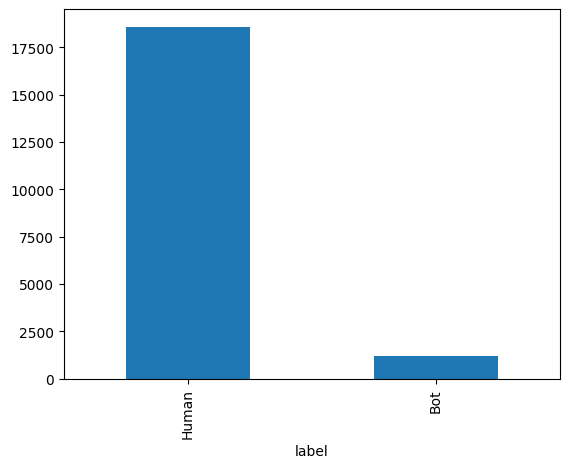

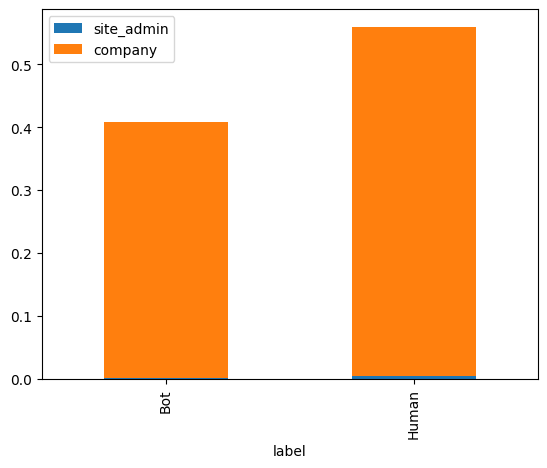

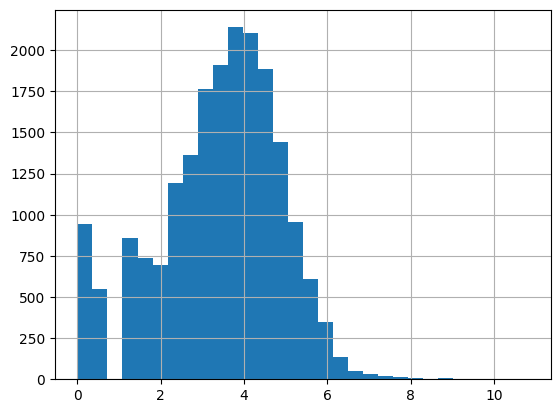

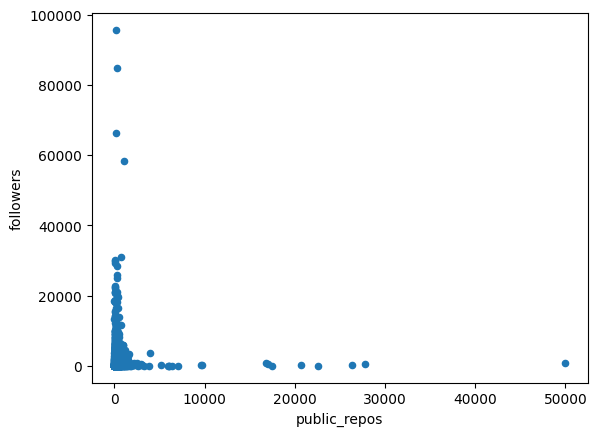

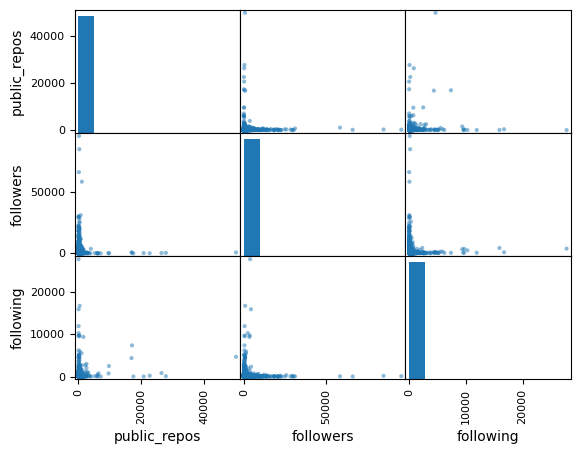

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('github_bot_processed_data.csv') 
data['label'].value_counts().plot(kind='bar')
plt.show()
data.groupby('label')[['site_admin','company']].mean().plot(kind='bar',stacked=True)
plt.show()
data['log_public_repos']=data['public_repos'].apply(lambda x:np.log(x+1))  #对数变换
data['log_public_repos'].hist(bins=30)
plt.show()
data.plot(kind='scatter',x='public_repos',y='followers')
plt.show()
pd.plotting.scatter_matrix(data[['public_repos','followers','following']])
plt.show()

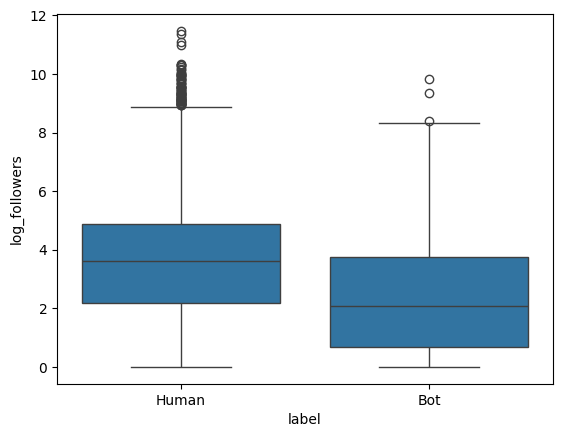

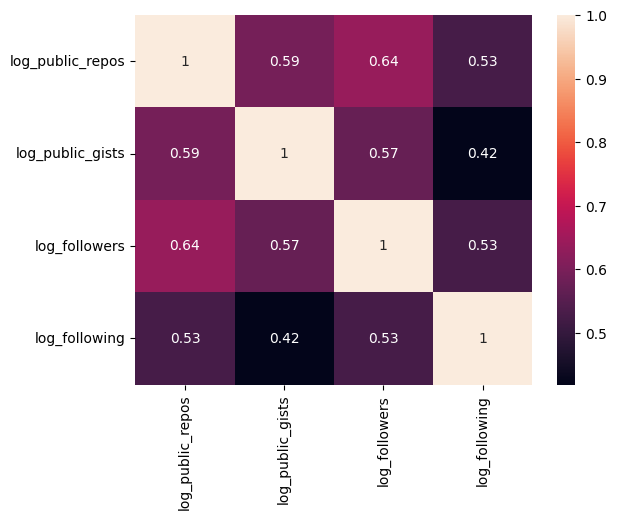

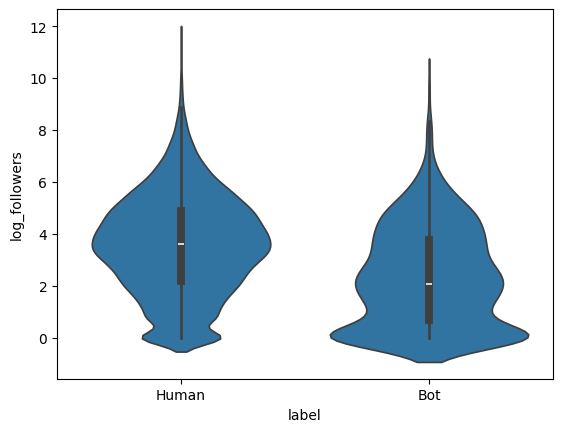

In [10]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('github_bot_processed_data.csv')
data['log_followers']=data['followers'].apply(lambda x:np.log(x+1))
sns.boxplot(x='label',y='log_followers',data=data)
plt.show()

#sns.pairplot(data,hue='label') 成对图
#plt.show()

data['log_public_repos']=data['public_repos'].apply(lambda x:np.log(x+1))  #对数变换
data['log_public_gists']=data['public_gists'].apply(lambda x:np.log(x+1))
data['log_followers']=data['followers'].apply(lambda x:np.log(x+1))
data['log_following']=data['following'].apply(lambda x:np.log(x+1))
corr=data[['log_public_repos','log_public_gists','log_followers','log_following']].corr()
sns.heatmap(corr,annot=True)
plt.show()

sns.violinplot(x='label',y='log_followers',data=data)
plt.show()